In [1]:
# EXERCISE 2
# Using telco_churn database, predict total charges

# a. Using the telco_churn database, extract a table for
#    each customer with a 2-year contract and include the
#    following information customer id, tenure, monthly
#    charges, and total charges.

# b. Export the table to a csv

# c. Create a jupyter notebook titled regression

# d. Prepare the Environment

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [23]:
# e. Read the information from the customers table into a dataframe.
path = '~/Documents/_datasci/Github/regression-exercises/'
df = pd.read_csv(path + "telco_churn.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.0+ KB


In [25]:
# f. How many rows are in your dataframe? 1695
     
# g. What is the data type of the field containing the customer ids? object (string)

# h. Print to the notebook the last 10 rows of your dataframe.
df.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.30
1688,9958-MEKUC,72,103.95,7517.70
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.40
1691,9972-EWRJS,67,19.25,1372.90
1692,9975-GPKZU,46,19.75,856.50
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.60


In [27]:
df.fillna(0)
df['num_total'] = pd.to_numeric(df.total_charges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 5 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null object
num_total          1685 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 66.3+ KB


In [28]:
# i. What is the inner quartile range of tenure?
#    monthly charges? total charges?
iqr_tenure = df.tenure.quantile(.75) - df.tenure.quantile(.25)
iqr_monthly_charges = df.monthly_charges.quantile(.75) - df.monthly_charges.quantile(.25)

iqr_total_charges = df.num_total.quantile(.75) - df.num_total.quantile(.25)
iqr_total_charges

4721.05

In [29]:
print(iqr_tenure)
print(iqr_monthly_charges)
print(iqr_total_charges)

23.0
66.42500000000001
4721.05


In [30]:
# j. How many missing values are in each variable?
print(df.isnull().sum())

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
num_total          10
dtype: int64


In [31]:
# k. Fill any missing values with 0.
df.num_total.replace('', 0, inplace=True)

In [32]:
# TODO: fix above 2k
print(df.isnull().sum())

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
num_total          10
dtype: int64


(array([638.,  13.,  48.,  70., 136., 118., 200., 139., 154., 179.]),
 array([ 18.4  ,  28.435,  38.47 ,  48.505,  58.54 ,  68.575,  78.61 ,
         88.645,  98.68 , 108.715, 118.75 ]),
 <a list of 10 Patch objects>)

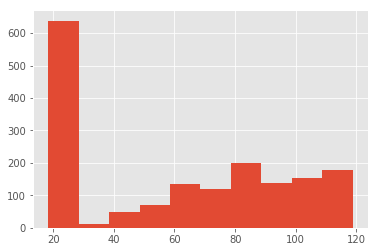

In [33]:
# l. Show the ditribution of monthly charges through a histogram
plt.hist(df.monthly_charges)

In [34]:
# m. Create a new dataframe that contains tenure, monthly
#    charges, and total charges, but not the customer id.

new_df = df.drop(columns=['customer_id'])
df

,customer_id,tenure,monthly_charges,total_charges,num_total
0,0013-SMEOE,71,109.70,7904.25,7904.25
1,0014-BMAQU,63,84.65,5377.80,5377.80
2,0016-QLJIS,65,90.45,5957.90,5957.90
3,0017-DINOC,54,45.20,2460.55,2460.55
4,0017-IUDMW,72,116.80,8456.75,8456.75
5,0019-EFAEP,72,101.30,7261.25,7261.25
6,0019-GFNTW,56,45.05,2560.10,2560.10
7,0020-INWCK,71,95.75,6849.40,6849.40
8,0040-HALCW,54,20.40,1090.60,1090.60
9,0042-RLHYP,69,19.70,1396.90,1396.90


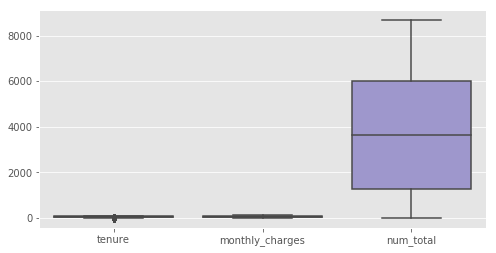

In [35]:
# n. Create a box plot of each variable in your new dataframe.
#    This should be a single chart with 3 categorical plots,
#    1 each for tenure, monthly charges, total charges.

plt.figure(figsize=(8,4))
sns.boxplot(data=df)

In [36]:
# o. Split your data into a test and train dataset.
#    Set the random_state to 123. You should end up with 4
#    dataframes: X_train, X_test, y_train, y_test.

# test_train_split
X = df.drop(['num_total','customer_id'], axis=1)
y = df[['num_total']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
# EXERCISE 3
# Using the in-sample data (X_train and y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


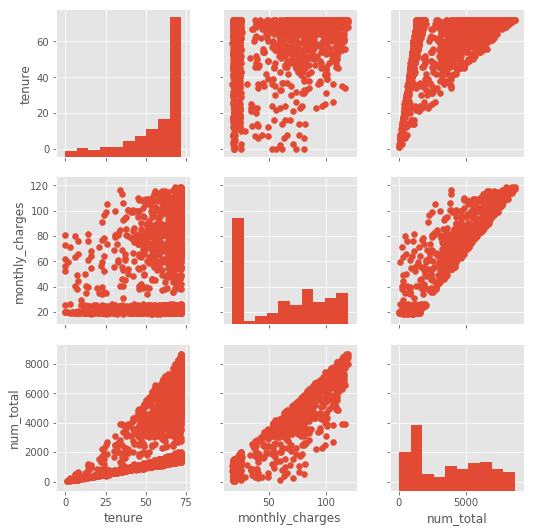

In [38]:
# a. Create a scatterplot for each combination of variables.
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

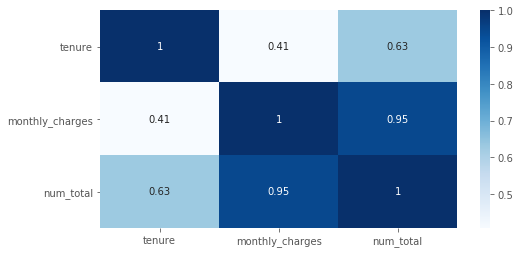

In [39]:
# b. Create a heatmap containing the 3 variables.
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


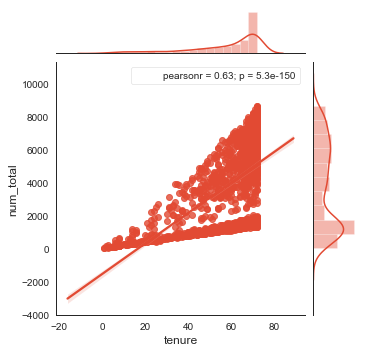

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


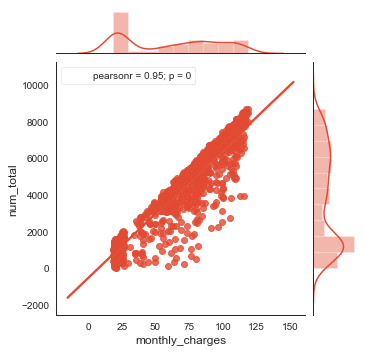

In [40]:
# c. Compute pearson's correlation coefficient and print it's value in the
#    sentence "Pearson's R is ____ with a significance p-value of ____"
columns = ['tenure', 'monthly_charges']
for col in columns:
    with sns.axes_style('white'):
        j = sns.jointplot(col, "num_total", data=train, kind='reg', height=5);
        j.annotate(stats.pearsonr)
        plt.show()

In [41]:
print('Pearson\'s R is .95 with a significance p-value of 0.')

Pearson's R is .95 with a significance p-value of 0.


In [42]:
# d. Train (aka fit) a linear regression model,
#    modeling total charges as a linear function of tenure.

# Create linear regression objects
lm1 = LinearRegression()
print(lm1)

lm1.fit(X_train[['tenure']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# e. What is the y-intercept of the regression line?
#    Translate the intercept in plain english,
#    i.e. what is means in the context of the data.
# f. What the slope of the regression line? Translate
#    the slope in plain english, i.e. what is means in
#    the context of the data.
# g. Write the linear function in the form of y = mx + b
#    using the parameters that were estimated from the
#    algorithm and the variable names for y and x specific
#    to your data.
print('Univariate - total_charges = b + m * monthly_charges')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])